<a href="https://colab.research.google.com/github/sarthakpruthi/deep-learning-fastai/blob/master/fastai3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from fastai import *
from fastai.vision import *

1st dataset

In [2]:
path = untar_data(URLs.PLANET_TINY)
tfms = get_transforms(flip_vert=True, max_lighting=0.1, max_zoom=1.05,
                      max_warp=0.)#sometimes shape changes when we take from up or down but not required in satellite data we need not require warp so we make it 0

In [3]:
path.ls()

[PosixPath('/root/.fastai/data/planet_tiny/train'),
 PosixPath('/root/.fastai/data/planet_tiny/labels.csv')]

In [5]:
pd.read_csv(path/"labels.csv").head()

,image_name,tags
0,train_31112,clear primary
1,train_4300,partly_cloudy primary water
2,train_39539,clear primary water
3,train_12498,agriculture clear primary road
4,train_9320,clear primary


In [0]:
#data = ImageDataBunch.from_csv(path, folder='train', size=128, suffix='.jpg', label_delim = ' ', ds_tfms=planet_tfms)
data=(ImageList.from_csv(path,'labels.csv',folder='train',suffix='.jpg')
                       .split_by_rand_pct()
                       .label_from_df(label_delim=' ')#we do not label from csv bcoz df consists of tags seperated by ' ' 
                       .transform(tfms,size=128)
                       .databunch().normalize(imagenet_stats))

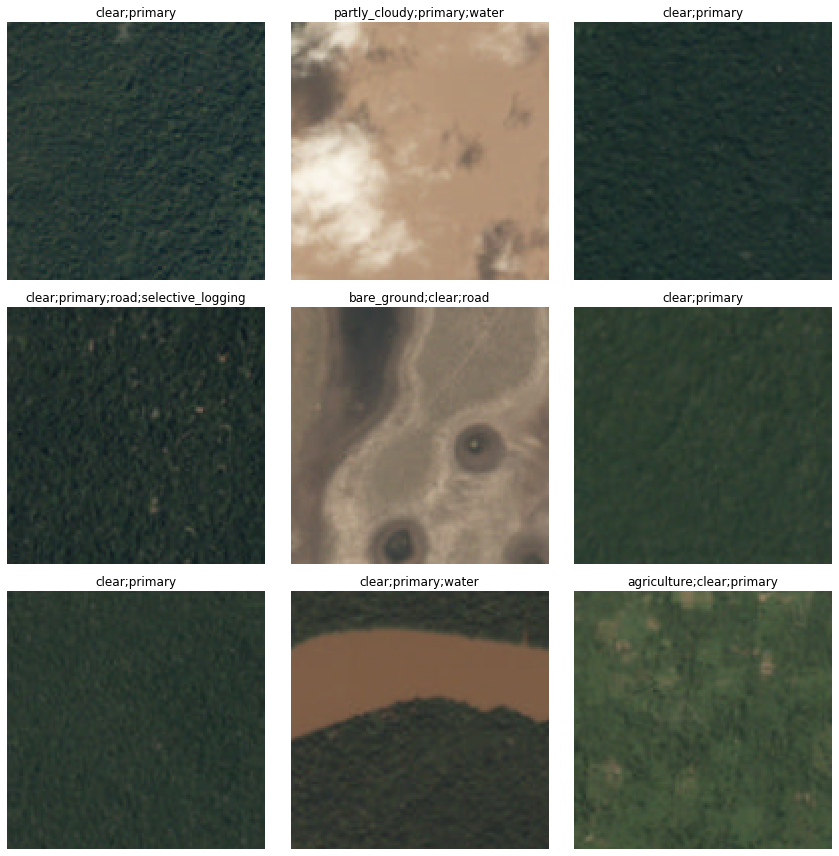

In [7]:
data.show_batch(3)

In [8]:
acc_02=partial(accuracy_thresh,thresh=0.2)#def acc(inp,target): return accuracy_thresh(inp,target,thresh=0.2)
#partial is nothing but similar to a function and just creates a new function
f_score=partial(fbeta,thresh=0.2)#f2 score ie how much positive or negative it is actually mean of false positive false negative true positive true negative
learn=cnn_learner(data,models.resnet50,metrics=[acc_02,f_score])

Downloading: "https://download.pytorch.org/models/resnet50-19c8e357.pth" to /root/.cache/torch/checkpoints/resnet50-19c8e357.pth
100%|██████████| 97.8M/97.8M [00:01<00:00, 91.7MB/s]


In [0]:
#in accuracy we used to get argmax from input and return mean of input comparing to target 

In [10]:
len(data.classes);data.c

14

In [0]:
#earlier in lesson 1 we used accuracy instead of accuracy_thresh bcoz we determined 
#the prediction for a given class by picking the activation that was the biggest but 
#here each activation can be 0 or 1, accuracy thresh selects the ones that are above certain threshold and compares them to ground truth

In [12]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


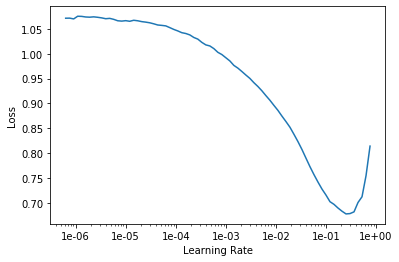

In [13]:
learn.recorder.plot()

In [0]:
lr=0.06

In [0]:
learn.fit_one_cycle(5,slice(lr))

epoch,train_loss,valid_loss,accuracy_thresh,fbeta,time
0,0.044206,0.351108,0.933929,0.873800,00:00
1,0.047505,0.332909,0.937500,0.872586,00:00
2,0.050278,0.361496,0.937500,0.879979,00:00
3,0.054686,0.365990,0.933929,0.870118,00:00
4,0.054140,0.362068,0.933929,0.870118,00:00


In [0]:
learn.save('stage-1-')

In [0]:
learn.unfreeze()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


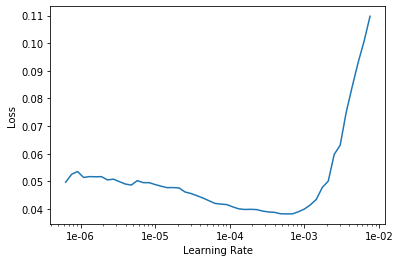

In [0]:
learn.lr_find()
learn.recorder.plot()

In [0]:
learn.fit_one_cycle(5,slice(3e-4,5e-4))

epoch,train_loss,valid_loss,accuracy_thresh,fbeta,time
0,0.028578,0.288144,0.941071,0.878123,00:00
1,0.031226,0.282278,0.942857,0.881817,00:00
2,0.028208,0.280385,0.941071,0.878123,00:00
3,0.028114,0.282399,0.941071,0.878123,00:00
4,0.029002,0.282075,0.941071,0.878123,00:00


In [0]:
learn.save('stage-2-rn50')

In [0]:
data=(ImageList.from_csv(path,'labels.csv',folder='train',suffix='.jpg')
                       .split_by_rand_pct()
                       .label_from_df(label_delim=' ')#we do not label from csv bcoz df consists of tags seperated by ' ' 
                       .transform(tfms,size=256)
                       .databunch().normalize(imagenet_stats))
learn.data=data
data.train_ds[0][0].shape

torch.Size([3, 256, 256])

In [0]:
learn.freeze()

In [0]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


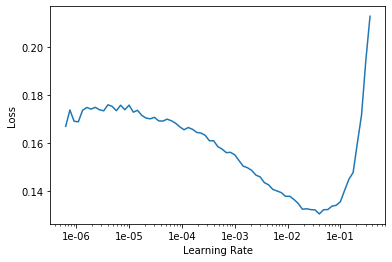

In [0]:
learn.recorder.plot()

In [0]:
learn.fit_one_cycle(5,slice(1e-2/2))

epoch,train_loss,valid_loss,accuracy_thresh,fbeta,time
0,0.169443,0.111069,0.951786,0.927584,00:02
1,0.170209,0.095273,0.960714,0.938252,00:01
2,0.162276,0.094787,0.960714,0.926884,00:01
3,0.158716,0.092040,0.962500,0.935108,00:01
4,0.154851,0.089013,0.969643,0.944677,00:01


In [0]:
learn.save('stage-1-256-rn50')

In [0]:
learn.unfreeze()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


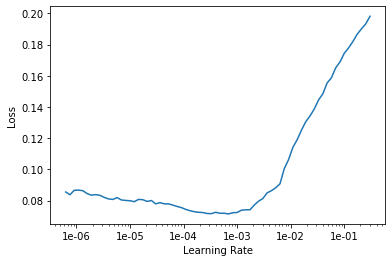

In [0]:
learn.lr_find()
learn.recorder.plot()

In [0]:
learn.fit_one_cycle(5,slice(1e-4))

epoch,train_loss,valid_loss,accuracy_thresh,fbeta,time
0,0.094586,0.104709,0.962500,0.943642,00:01
1,0.080859,0.095170,0.966071,0.949458,00:01
2,0.083741,0.086709,0.973214,0.954816,00:01
3,0.077739,0.079447,0.973214,0.958313,00:01
4,0.079308,0.076337,0.969643,0.955079,00:01


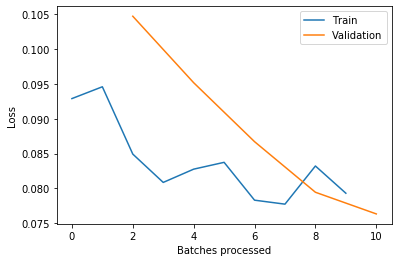

In [0]:
learn.recorder.plot_losses()

In [0]:
learn.save('stage-2-256-rn50')

2nd dataset

In [0]:
path=untar_data(URLs.MNIST_TINY)
path.ls()

[PosixPath('/root/.fastai/data/mnist_tiny/models'),
 PosixPath('/root/.fastai/data/mnist_tiny/train'),
 PosixPath('/root/.fastai/data/mnist_tiny/labels.csv'),
 PosixPath('/root/.fastai/data/mnist_tiny/valid'),
 PosixPath('/root/.fastai/data/mnist_tiny/test')]

In [0]:
pd.read_csv(path/'labels.csv').head()

,name,label
0,train/3/7463.png,3
1,train/3/9829.png,3
2,train/3/7881.png,3
3,train/3/8065.png,3
4,train/3/7046.png,3


In [0]:
tfms=get_transforms(do_flip=False)

In [0]:
data=(ImageList.from_folder(path)
                        .split_by_folder()
                        .label_from_folder()
                        .add_test_folder()
                        .transform(tfms)
                        .databunch().normalize(imagenet_stats))

In [0]:
data.train_ds[0]

(Image (3, 28, 28), Category 3)

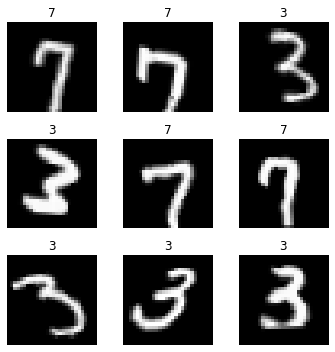

In [0]:
data.show_batch(3,figsize=(5,5))

3rd dataset

In [14]:
path=untar_data(URLs.CAMVID)
path.ls()

[PosixPath('/root/.fastai/data/camvid/images'),
 PosixPath('/root/.fastai/data/camvid/valid.txt'),
 PosixPath('/root/.fastai/data/camvid/labels'),
 PosixPath('/root/.fastai/data/camvid/codes.txt')]

In [15]:
path_lbl=path/'labels'
path_img=path/'images'
(path/'images').ls()

[PosixPath('/root/.fastai/data/camvid/images/Seq05VD_f01770.png'),
 PosixPath('/root/.fastai/data/camvid/images/0016E5_06330.png'),
 PosixPath('/root/.fastai/data/camvid/images/0006R0_f01830.png'),
 PosixPath('/root/.fastai/data/camvid/images/0016E5_04800.png'),
 PosixPath('/root/.fastai/data/camvid/images/0016E5_00930.png'),
 PosixPath('/root/.fastai/data/camvid/images/0016E5_01080.png'),
 PosixPath('/root/.fastai/data/camvid/images/0016E5_08101.png'),
 PosixPath('/root/.fastai/data/camvid/images/0006R0_f02250.png'),
 PosixPath('/root/.fastai/data/camvid/images/0016E5_00901.png'),
 PosixPath('/root/.fastai/data/camvid/images/0016E5_05400.png'),
 PosixPath('/root/.fastai/data/camvid/images/Seq05VD_f00420.png'),
 PosixPath('/root/.fastai/data/camvid/images/0016E5_01770.png'),
 PosixPath('/root/.fastai/data/camvid/images/0016E5_05190.png'),
 PosixPath('/root/.fastai/data/camvid/images/0016E5_08017.png'),
 PosixPath('/root/.fastai/data/camvid/images/0001TP_010230.png'),
 PosixPath('/root/

In [16]:
codes=np.loadtxt(path/'codes.txt',dtype=str);codes
#this is general way to load txt files and the default type is float and we need to chanage it

array(['Animal', 'Archway', 'Bicyclist', 'Bridge', 'Building', 'Car', 'CartLuggagePram', 'Child', 'Column_Pole',
       'Fence', 'LaneMkgsDriv', 'LaneMkgsNonDriv', 'Misc_Text', 'MotorcycleScooter', 'OtherMoving', 'ParkingBlock',
       'Pedestrian', 'Road', 'RoadShoulder', 'Sidewalk', 'SignSymbol', 'Sky', 'SUVPickupTruck', 'TrafficCone',
       'TrafficLight', 'Train', 'Tree', 'Truck_Bus', 'Tunnel', 'VegetationMisc', 'Void', 'Wall'], dtype='<U17')

In [0]:
#where about color coding for each pixel in different way
get_y_fn=lambda x:path_lbl/f'{x.stem}_P{x.suffix}'

In [18]:
lbl_names=get_image_files(path_lbl)
lbl_names[:3]

[PosixPath('/root/.fastai/data/camvid/labels/0016E5_04410_P.png'),
 PosixPath('/root/.fastai/data/camvid/labels/0016E5_02280_P.png'),
 PosixPath('/root/.fastai/data/camvid/labels/0006R0_f03630_P.png')]

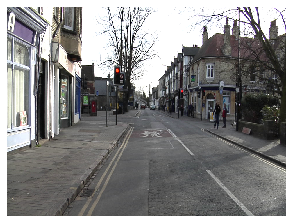

In [19]:
fnames=get_image_files(path_img)
img_f=fnames[0]
img=open_image(img_f)
img.show(figsize=(5,5))

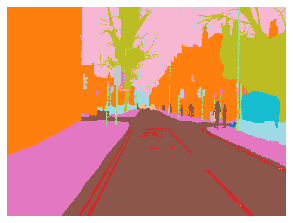

In [20]:
mask=open_mask(get_y_fn(img_f))
mask.show(figsize=(5,5),alpha=1)#alpha makes the picture darker

In [21]:
 src_size=np.array(mask.shape[1:])
 src_size,mask.data

(array([720, 960]), tensor([[[ 4,  4,  4,  ..., 21, 21, 21],
          [ 4,  4,  4,  ..., 21, 21, 21],
          [ 4,  4,  4,  ..., 30, 21, 21],
          ...,
          [19, 19, 19,  ..., 17, 17, 17],
          [19, 19, 19,  ..., 17, 17, 17],
          [19, 19, 19,  ..., 17, 17, 17]]]))

In [0]:
size=src_size//2

In [0]:
data=(SegmentationItemList.from_folder(path_img)#we use segmentation item list since we need to give every figure different pixel vlaue and hence we make segmentaiton
               .split_by_fname_file('../valid.txt')
               .label_from_func(get_y_fn,classes=codes)
               .transform(get_transforms(),size=size,tfm_y=True)
               .databunch(bs=1).normalize(imagenet_stats))

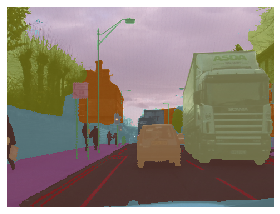

In [24]:

data.show_batch(3)

In [0]:
#training loss>validation loss-underfitting
#train for longer
#train last layers at lower learning rate

In [0]:
#this is done to remove empty areas
name2id={v:k for k,v in enumerate(codes)}
void_code=name2id['Void']
#check ??accuracy before
def acc_camvid(input,target):
  target=target.squeeze(1)
  mask=target!=void_code
  return (input.argmax(dim=1)[mask]==target[mask]).float().mean()

In [0]:
#we use unet for segmentation list instead of cnn
#normal cnn takes big image and makes it small whereas unet makes small image to big making it U

In [0]:
metrics=acc_camvid

In [32]:
learn=unet_learner(data,models.resnet34,metrics=metrics)

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/checkpoints/resnet34-333f7ec4.pth
100%|██████████| 83.3M/83.3M [00:00<00:00, 255MB/s]


In [0]:
??accuracy

In [33]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


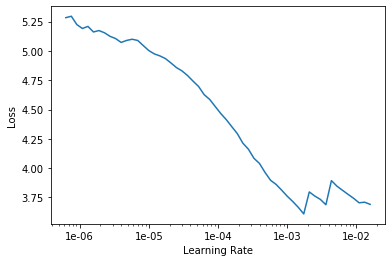

In [34]:
learn.recorder.plot()

In [35]:
learn.fit_one_cycle(1,slice(8e-4,1e-3))

epoch,train_loss,valid_loss,acc_camvid,time
0,0.709682,0.648670,0.841009,01:09


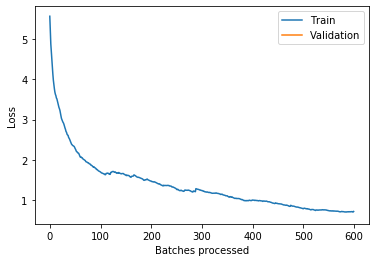

In [36]:
learn.recorder.plot_losses()

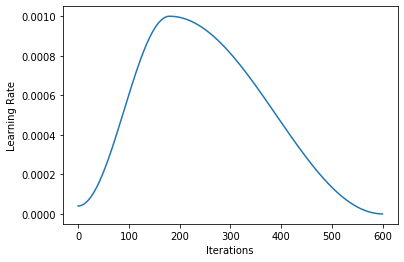

In [37]:
learn.recorder.plot_lr()

In [0]:
#then we do same thing with size=src_size instead of src_size//2

In [0]:
??accuracy

In [0]:
#we can use learn.show_results() to see our predictions and the ground truth

In [0]:
size=src_size

In [0]:
data=(SegmentationItemList.from_folder(path_img)
                          .split_by_fname_file('../valid.txt')
                          .label_from_func(get_y_fn,classes=codes)
                          .transform(get_transforms(),size=size,tfm_y=True)
                          .databunch(bs=1).normalize(imagenet_stats))

In [0]:
learn=unet_learner(data,models.resnet34,metrics=metrics)

In [43]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


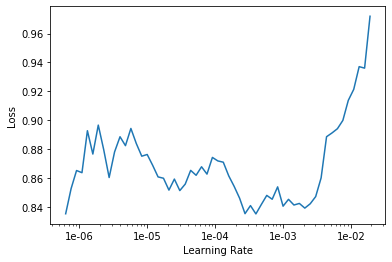

In [44]:
learn.recorder.plot()

In [46]:
learn.fit_one_cycle(1,2.6e-4)

epoch,train_loss,valid_loss,acc_camvid,time
0,0.608041,0.583315,0.846923,01:09


4th dataset

In [0]:
path=untar_data(URLs.COCO_TINY)
path.ls()

[PosixPath('/root/.fastai/data/coco_tiny/train.json'),
 PosixPath('/root/.fastai/data/coco_tiny/train')]

In [0]:
#there is  helper function in the library that reads the annotations file and returns the list if image names with their bbox associated to it.
#we convert it to a dictionary that maps image names with their bbox 
#and then write the function that will give us target for each image filename
images,lbl_bbox=get_annotations(path/'train.json')#annotation means a note by a way of explaining
img2box={img:bb for img,bb in zip(images,lbl_bbox)}
get_y_fn=lambda o:img2box[o.name]

In [0]:
tfms=get_transforms()

In [0]:
#the only new addition is the use of special function to collate the samples in batches.
#this comes from the fact that that our images may have multiple bounding boxes,so we need to pad them to largest number of bounding boxes
data=(ObjectItemList.from_folder(path)
                   .split_by_rand_pct()
                   .label_from_func(get_y_fn) 
                   .transform(tfms)
                   .databunch(bs=16,collate_fn=bb_pad_collate))#collate the sample in batches,this comes from the fact that the images may have multiple bounding boxes so we need to pad them to the largest number of boumding boxes

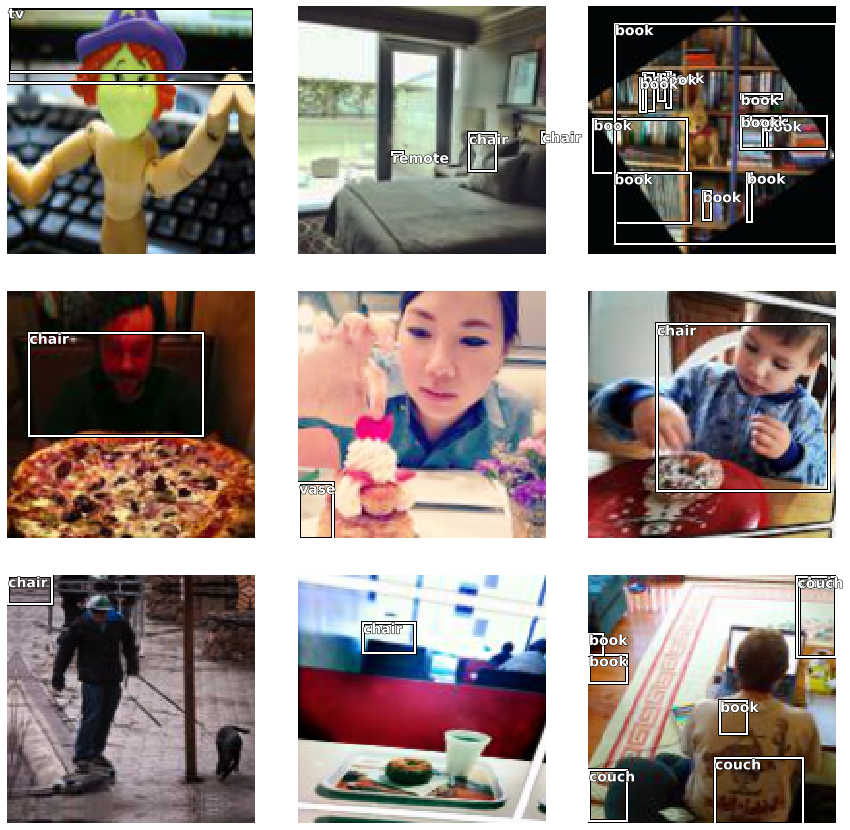

In [0]:
data.show_batch(3)